### College List Evaluation 
#### 5/23/2019

Comparison analysis between the suggested NSC college participation list (~3500 colleges) and the existing NCES standard college list (~2500).

In [215]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from fuzzywuzzy import fuzz
import Levenshtein as lev
from fuzzywuzzy import process

In [216]:
nsc = pd.read_excel('NSC_Participation_201905.xlsx')
nsc.columns = nsc.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
nsc = nsc.drop(['participant_since', 'school_code'], axis=1)
nsc.head()

,state,school_name
0,Wyoming,Casper College
1,Wyoming,Laramie County Community College
2,Wyoming,Central Wyoming College
3,Wyoming,Northern Wyonming Community College District
4,Wyoming,Northwest College


In [217]:
nces = pd.read_excel('Std_List_Colleges.xlsx',sheet_name='A. List of College Univ (Full)')
nces.columns = std.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') 
nces = nces.drop(['bachelors_degrees_2017'], axis=1)
nces.head()

,name
0,Abilene Christian University
1,Abraham Baldwin Agricultural College
2,Abraham Lincoln University
3,Academy College
4,Academy of Art University


In [218]:
## Number of colleges in NSC list = 3729 
nsc.count() + 1

state          3729
school_name    3729
dtype: int64

In [219]:
## Number of colleges in Std list = 2529
nces.count() + 1

name    2529
dtype: int64

In [220]:
nsc_name = nsc.school_name
nces_name = nces.name

In [246]:
total = nsc.merge(nces,left_on='school_name',right_on='name', how="left")
total.head()
# total

,state,school_name,name
0,Wyoming,Casper College,NaN
1,Wyoming,Laramie County Community College,NaN
2,Wyoming,Central Wyoming College,NaN
3,Wyoming,Northern Wyonming Community College District,NaN
4,Wyoming,Northwest College,NaN


In [247]:
mismatch = total[total['name'].isnull()]
mismatch.head()

,state,school_name,name
0,Wyoming,Casper College,NaN
1,Wyoming,Laramie County Community College,NaN
2,Wyoming,Central Wyoming College,NaN
3,Wyoming,Northern Wyonming Community College District,NaN
4,Wyoming,Northwest College,NaN


text = mismatch.school_name
stop_words = ["College", "University"] + list(STOPWORDS)
wordcloud = WordCloud(
    width = 800,
    height = 300,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [273]:
len(mismatch)

2469

In [252]:
len(mismatch)

2469

In [253]:
d = []
for i in mismatch.school_name:
    r = process.extractOne(i, nces.name, score_cutoff=96)
    d.append(r)

In [254]:
d

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ('Herzing University-Brookfield', 97, 853),
 ('Herzing University-Kenosha', 96, 855),
 ('Herzing University-Madison', 96, 856),
 None,
 ('Bryant & Stratton College-Bayshore', 97, 290),
 None,
 None,
 None,
 None,
 None,
 ('University of Wisconsin-Platteville', 97, 2335),
 None,
 None,
 None,
 None,
 None,
 None,
 ('University of Wisconsin-Parkside', 97, 2334),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ('University of Wisconsin-Whitewater', 97, 2340),
 ('University of Wisconsin-Oshkosh', 97, 2333),
 None,
 None,
 None,
 None,
 ('University of Wisconsin-Green Bay', 97, 2328),
 ('University of Wisconsin-Stout', 98, 2338),
 ('University of Wisconsin-Superior', 97, 2339),
 None,
 ('University of Wisconsin-Madison', 97, 2330),
 ('University of Wisconsin-Milwaukee', 97, 2331),
 ('University of Wisconsin-Stevens Point', 97, 2337),
 ('University of Wisconsin-Eau Claire', 97, 

In [272]:
mismatch['fuzz_match'] = d
mismatch.to_excel("FuzzyWuzzy.xlsx")
len(mismatch)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2469

In [262]:
mismatch_2 = mismatch[mismatch['fuzz_match'].isnull()]
len(mismatch_2)

2251

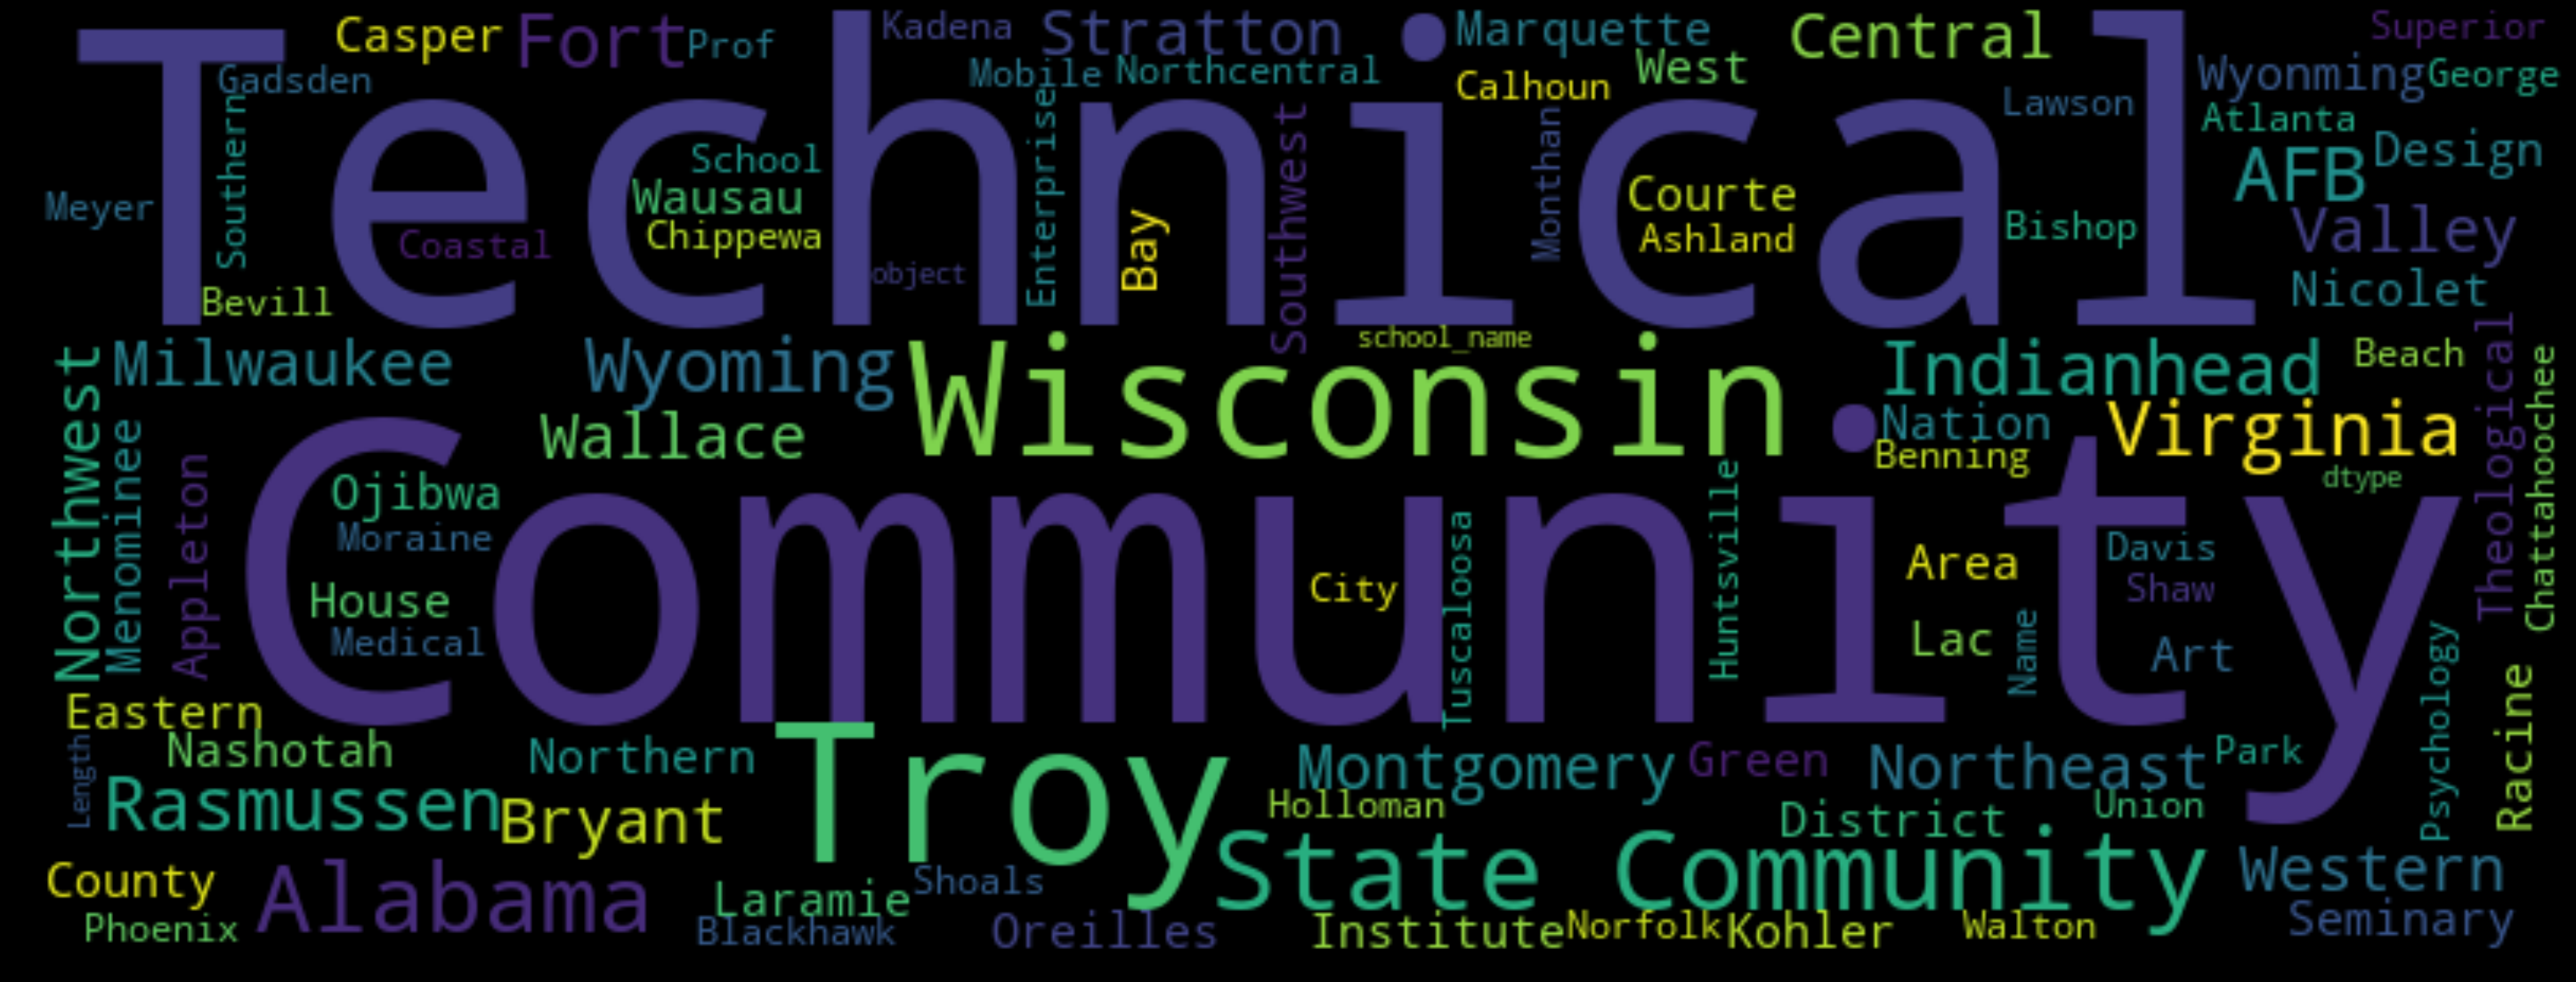

In [271]:
text = mismatch_2.school_name
wordcloud = WordCloud(
    width = 800,
    height = 300,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Larger words as associated with words with higher frequency. I.e. community college is very frequent in the NSC list excluding matches from NCES.

In [292]:
mismatch_2.head()

,state,school_name,name,fuzz_match
0,Wyoming,Casper College,NaN,None
1,Wyoming,Laramie County Community College,NaN,None
2,Wyoming,Central Wyoming College,NaN,None
3,Wyoming,Northern Wyonming Community College District,NaN,None
4,Wyoming,Northwest College,NaN,None


In [278]:
overlap = len(nsc) - len(mismatch_2)
overlap / len(nsc)
# Percentage of overlap

0.39619098712446355

In [303]:
nsc_cc = len(nsc[nsc['school_name'].str.contains('Community College|Technical|Institute|Technology')])
nsc_cc

872

In [306]:
nces_cc = len(nces[nces['name'].str.contains('Community College|Technical|Institute|Technology')])
nces_cc

146

In [307]:
nsc_cc / len(nsc)

0.23390557939914164

In [308]:
nces_cc / len(nces)

0.05775316455696203

In [ ]:
- what colleges are on the nces list and not on the nsc list?
- explanation of the large gap?